In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

from scipy.stats import norm

%matplotlib notebook

<IPython.core.display.Javascript object>


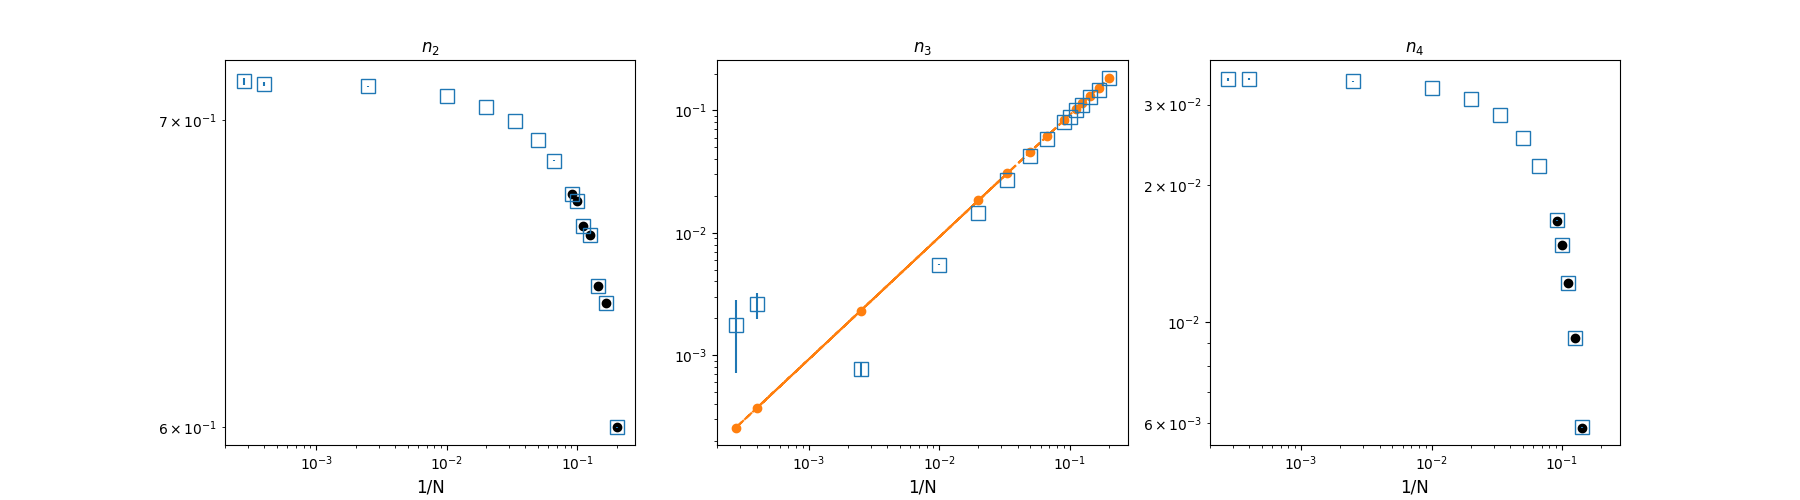

In [2]:
with open('Homopolymer_simulations/Canonical/bulk_EE_from_5_to_11.pickle', 'rb') as f:
    data_EE = pickle.load(f)
 
lengths=np.arange(5,12)
data_np = np.array(data_EE)

fig, axes = plt.subplots(1, 3, figsize=(18,5)) #,  sharey='row')
axes = axes.reshape(-1)

#Exact enumeration data
axes[0].scatter(1/lengths, data_np[:,0], c ="k", label = "j = 0"  )
axes[1].scatter(1/lengths, data_np[:,1]-1/4,c ="k", label = "j = 0"  )
axes[2].scatter(1/lengths, data_np[:,2],c ="k",  label = "j = 0"  )


#MC data
data_np = np.loadtxt("Homopolymer_simulations/Canonical/zero.txt", skiprows=0)


lengths = data_np[:, 0]

axes[0].errorbar(1/lengths, data_np[:,20], yerr=data_np[:,21],  fmt="s", ms = 10, label = "j = 0",fillstyle='none'  )
axes[1].errorbar(1/lengths, np.abs(data_np[:,22]-0.25), yerr=data_np[:,23],  fmt="s", ms = 10, label = "j = 0",fillstyle='none'  )
axes[2].errorbar(1/lengths, data_np[:,24], yerr=data_np[:,25],  fmt="s", ms = 10, label = "j = 0",fillstyle='none'  )
   
axes[0].set_title(r'$n_2$')    
axes[1].set_title(r'$n_3$')    
axes[2].set_title(r'$n_4$') 
 
 
    
    
A = np.vstack([1/lengths[2:], np.ones(len(lengths[2:]))]).T
#print(A.shape)
m1, c1 = np.linalg.lstsq( np.log(A), np.log(np.abs(data_np[2:,22]-0.25 )) , rcond=None)[0]

axes[1].plot(1/lengths[2:],1/lengths[2:]*m1+c1, "o--")

for i in range(3):
    axes[i].set_xlabel("1/N", fontsize=12)
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')

In [ ]:
lengths = data_np[:, 0]
lengths

In [3]:
df = pd.DataFrame({"L": data_np[:, 0],
                   "n2" : data_np[:, 20],
                   "dn2": data_np[:, 21],
                   "n3" : data_np[:, 22], 
                   "dn3" : data_np[:, 23],
                   "n4" : data_np[:, 24], 
                   "dn4" : data_np[:, 25],

                  })

In [4]:
df = df.sort_values(by="L")

In [ ]:
df

<IPython.core.display.Javascript object>


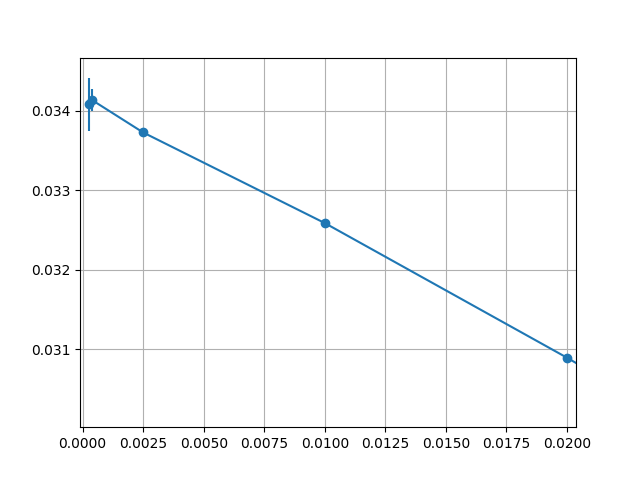

In [23]:
plt.errorbar(1/df["L"], df["n4"], yerr=df["dn4"], fmt='o-')
#plt.yscale('log')
#plt.xscale('log')
plt.grid(True)

In [ ]:
plt.loglog(1/df["L"], df["n4"], 'o--')

<IPython.core.display.Javascript object>


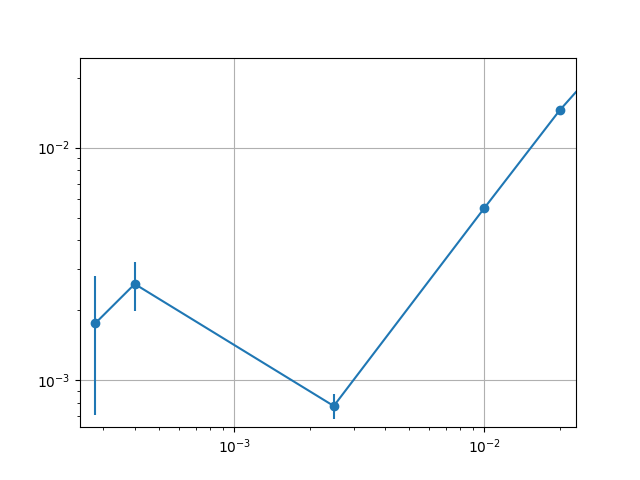

In [24]:
plt.errorbar(1/df["L"], abs(0.25-df["n3"]), yerr=df["dn3"], fmt='o-')
plt.xscale('log')
plt.yscale('log')
plt.grid()

<IPython.core.display.Javascript object>


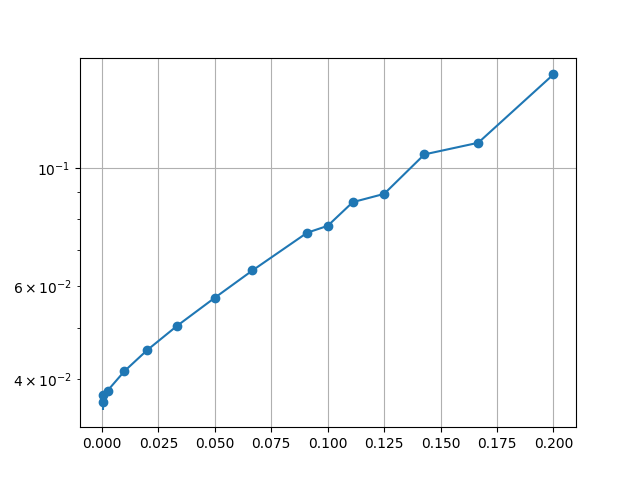

In [17]:
plt.errorbar(1/df["L"], 0.75 - df["n2"], yerr=df["dn2"], fmt='o-')
#plt.xscale('log')
plt.yscale('log')
plt.grid()

In [18]:
df["L"]

10       5.0
11       6.0
12       7.0
13       8.0
14       9.0
1       10.0
2       11.0
3       15.0
4       20.0
6       30.0
9       50.0
0      100.0
8      400.0
5     2500.0
7     3600.0
Name: L, dtype: float64

<IPython.core.display.Javascript object>


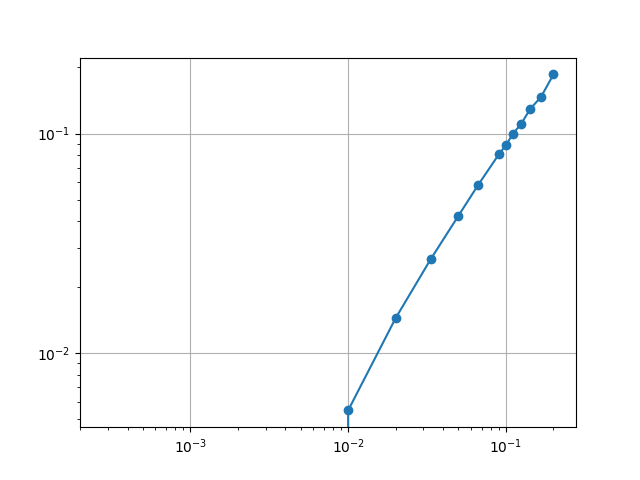

In [7]:
plt.loglog(1/df["L"], 0.25 - df["n3"], 'o-')
plt.grid()